# 🚢 Análise Exploratória de Dados — Titanic

## Contexto
Este projeto tem como objetivo realizar uma análise exploratória do dataset do Titanic,
buscando identificar padrões e fatores que influenciaram a sobrevivência dos passageiros.

Dataset clássico amplamente utilizado em estudos introdutórios de Ciência de Dados.

---
## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

---
## Carregamento do dataset

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
## Visão geral dos dados

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---
## Identificação dos tipos de variáveis

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Tipos de Variáveis

**Variáveis Numéricas**:
  - Age (idade do passageiro)
  - Fare (tarifa paga)
  - SibSp (número de irmãos/cônjuges a bordo)
  - Parch (número de pais/filhos a bordo)
    
**Variáveis Categóricas**:
  - Sex (sexo do passageiro)
  - Embarked (porto de embarque)
  - Pclass (classe socioeconômica: 1ª, 2ª ou 3ª)

**Variáveis Textuais / Identificadores**:
  - Name (nome do passageiro)
  - Ticket (número do bilhete)
  - Cabin (identificação da cabine)

**Variável Alvo**:
  - Survived (indicador de sobrevivência: 0 = não sobreviveu, 1 = sobreviveu)

---
## Primeira análise do alvo (Survived)

In [7]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
df["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

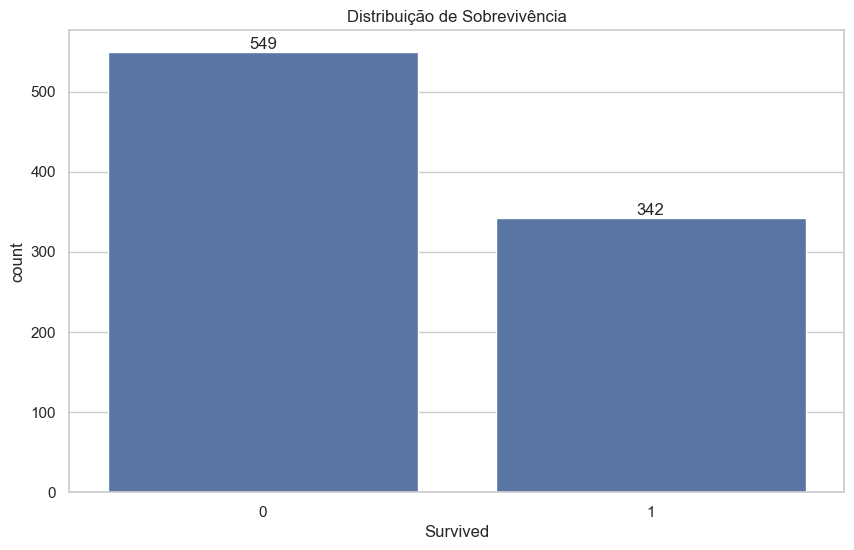

In [9]:
ax = sns.countplot(x="Survived", data=df)
plt.title("Distribuição de Sobrevivência")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

## Hipóteses Iniciais

Com base na estrutura original do dataset, algumas hipóteses iniciais podem ser levantadas:

1. Passageiros do sexo feminino apresentaram maior taxa de sobrevivência.
2. Passageiros da 1ª classe (`Pclass = 1`) tiveram maior probabilidade de sobrevivência do que os da 3ª classe.
3. Crianças e passageiros mais jovens tiveram maiores chances de sobreviver.
4. Tarifas mais altas (`Fare`) estão associadas a maior probabilidade de sobrevivência.
5. Passageiros com famílias muito grandes ou viajando sozinhos podem apresentar taxas de sobrevivência distintas.

As hipóteses são formuladas com base em conhecimento prévio sobre o evento e serão avaliadas ao longo da análise exploratória, não representando conclusões neste estágio.

---
## Diagnóstico de valores ausentes

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Análise
- Age: valores ausentes relevantes (19,9%)
- Cabin: grande volume de valores ausentes (77,1%)
- Embarked: poucos valores ausentes

## Decisão por coluna
`Age`

- Importante para análise
- Nulos não podem ser ignorados
- Decisão: imputar (estratégia será definida)

`Cabin`

- Muitos nulos
- Informação fragmentada
- Decisão: não imputar valor textual diretamente

`Embarked`

- Poucos nulos
- Decisão: imputar com moda

`PassengerId` / `Name` / `Ticket`

- Não entram em análise estatística direta
- Decisão: manter por enquanto (remoção posterior)

---
## Tratamento de Embarked

In [11]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [13]:
# Validação
df["Embarked"].isnull().sum()

np.int64(0)

---
## Tratamento de Age (primeira abordagem)

In [14]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [15]:
# Validação
df["Age"].isnull().sum()

np.int64(0)

---
## Tratamento da variável Cabin

A variável `Cabin` apresenta grande volume de valores ausentes, o que inviabiliza
uma imputação direta sem perda significativa de informação.

Neste estágio da análise exploratória, a variável será mantida sem tratamento,
sendo avaliada posteriormente para possível engenharia de features ou descarte.

---
## Criação de variável derivada: FamilySize

In [16]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

---
## Validação final do dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


---
## 🧪 Estudo 1 — Sobrevivência × Sexo
### 📌 Pergunta analítica

    Existe diferença na taxa de sobrevivência entre homens e mulheres?

In [18]:
# Taxa de sobrevivência por sexo
survival_by_sex = (
    df.groupby("Sex")["Survived"]
    .mean()
    .reset_index()
)

survival_by_sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


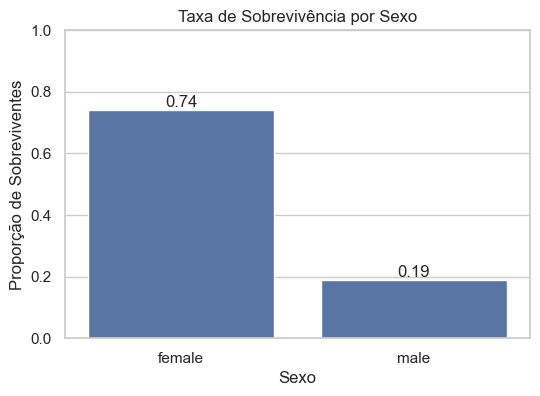

In [19]:
plt.figure(figsize=(6,4))

ax = sns.barplot(
    data=survival_by_sex,
    x="Sex",
    y="Survived"
)

plt.title("Taxa de Sobrevivência por Sexo")
plt.ylabel("Proporção de Sobreviventes")
plt.xlabel("Sexo")
plt.ylim(0, 1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")

plt.show()

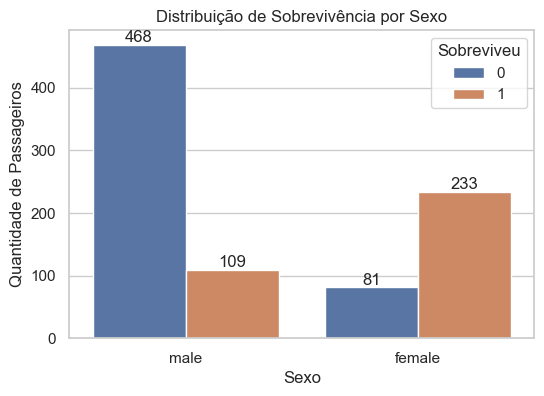

In [20]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    data=df,
    x="Sex",
    hue="Survived"
)

plt.title("Distribuição de Sobrevivência por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Quantidade de Passageiros")
plt.legend(title="Sobreviveu")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

## 🧠 Interpretação analítica
Observa-se uma diferença expressiva na taxa de sobrevivência entre os sexos. Passageiras do sexo feminino apresentaram uma taxa de sobrevivência de aproximadamente 74%, enquanto passageiros do sexo masculino apresentaram apenas cerca de 19%.

A distribuição absoluta reforça esse padrão, evidenciando que, apesar do maior número total de homens a bordo, a maioria das sobreviventes foi composta por mulheres.

Esses resultados indicam que o sexo foi um fator altamente relevante na sobrevivência dos passageiros, possivelmente refletindo prioridades adotadas durante o processo de evacuação

**Hipótese:**
```
Passageiros do sexo feminino apresentaram maior taxa de sobrevivência.
✅ Hipótese confirmada pelos dados.
```

---
## 🧪 Estudo 2 — Sobrevivência × Classe (`Pclass`)
### 📌 Pergunta analítica

    A classe do passageiro influenciou as chances de sobrevivência?

In [21]:
# Taxa de sobrevivência por classe
survival_by_class = (
    df.groupby("Pclass")["Survived"]
    .mean()
    .reset_index()
    .sort_values("Pclass")
)

survival_by_class

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


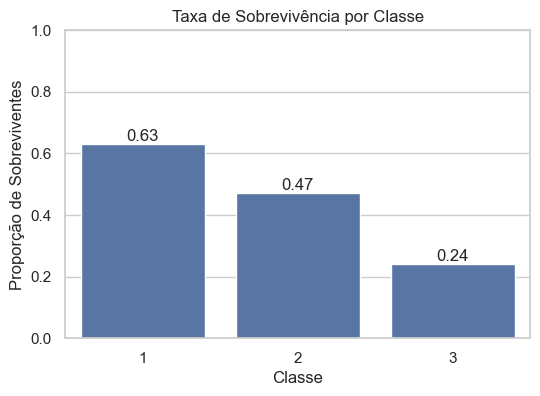

In [22]:
plt.figure(figsize=(6,4))

ax = sns.barplot(
    data=survival_by_class,
    x="Pclass",
    y="Survived"
)

plt.title("Taxa de Sobrevivência por Classe")
plt.xlabel("Classe")
plt.ylabel("Proporção de Sobreviventes")
plt.ylim(0, 1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")

plt.show()


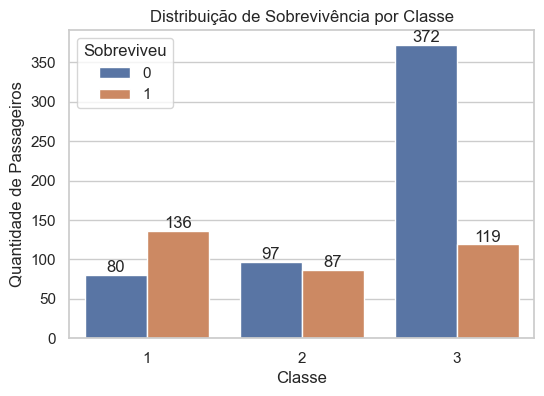

In [23]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    data=df,
    x="Pclass",
    hue="Survived"
)

plt.title("Distribuição de Sobrevivência por Classe")
plt.xlabel("Classe")
plt.ylabel("Quantidade de Passageiros")
plt.legend(title="Sobreviveu")

# Rótulos
for container in ax.containers:
    ax.bar_label(container)

plt.show()

## 🧠 Interpretação analítica
Observa-se uma relação clara entre a classe do passageiro e a taxa de sobrevivência. A probabilidade de sobrevivência foi significativamente maior na 1ª classe (63%), seguida pela 2ª classe (47%) e, por fim, pela 3ª classe (24%), indicando um gradiente decrescente conforme a classe social.

A análise da distribuição absoluta reforça essa diferença de proporções. Embora a 3ª classe apresente um número absoluto de sobreviventes relativamente próximo ao da 1ª classe, isso ocorre devido ao fato de concentrar a maior parte dos passageiros a bordo, representando cerca de 55% do total. Como consequência, mesmo com uma baixa taxa de sobrevivência, o volume absoluto de sobreviventes permanece elevado.

Portanto, ao considerar a probabilidade individual de sobrevivência, a classe social mostrou-se um fator altamente relevante, com passageiros das classes mais altas apresentando chances substancialmente maiores de sobreviver ao desastre.

**Hipótese:**
```
Passageiros da 1ª classe tiveram maior probabilidade de sobrevivência do que os da 3ª classe.
✅ Hipótese confirmada pelos dados.
```

---
## 🧪 Estudo 3 — Sobrevivência × Idade (`Age`)
### 📌 Pergunta analítica

    Passageiros mais jovens apresentaram maior probabilidade de sobrevivência?

Neste estudo, idade é uma variável contínua, então o foco será distribuição, não média simples.

In [24]:
# Estatísticas descritivas da idade por sobrevivência
df.groupby("Survived")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.028233,12.499986,1.00,23.0,28.0,35.0,74.0
1,342.0,28.291433,13.764425,0.42,21.0,28.0,35.0,80.0


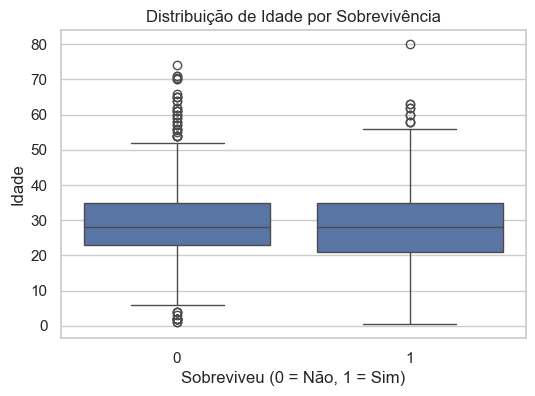

In [25]:
plt.figure(figsize=(6,4))

sns.boxplot(
    data=df,
    x="Survived",
    y="Age"
)

plt.title("Distribuição de Idade por Sobrevivência")
plt.xlabel("Sobreviveu (0 = Não, 1 = Sim)")
plt.ylabel("Idade")

plt.show()

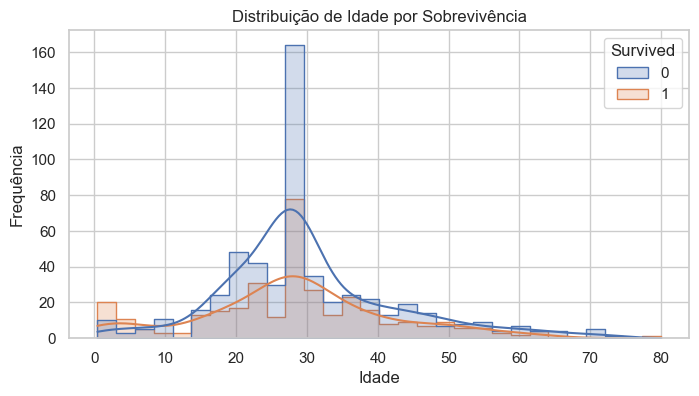

In [26]:
plt.figure(figsize=(8,4))

sns.histplot(
    data=df,
    x="Age",
    hue="Survived",
    bins=30,
    kde=True,
    element="step"
)

plt.title("Distribuição de Idade por Sobrevivência")
plt.xlabel("Idade")
plt.ylabel("Frequência")

plt.show()

## 🧠 Interpretação analítica
A análise da idade em relação à sobrevivência não revela diferenças expressivas entre os grupos. A idade mediana dos sobreviventes e dos não sobreviventes é a mesma (28 anos), e os intervalos interquartis são bastante semelhantes, indicando distribuições próximas.

Os gráficos de distribuição mostram que a maior concentração de passageiros, tanto sobreviventes quanto não sobreviventes, está entre aproximadamente 20 e 35 anos, sugerindo que essa faixa etária predominava a bordo do navio.

Embora exista uma leve diferença na média de idade, com sobreviventes sendo marginalmente mais jovens, essa variação não é suficiente para afirmar que a idade, de forma isolada, foi um fator determinante para a sobrevivência. A influência da idade pode estar associada a grupos específicos, como crianças, e será melhor compreendida em análises combinadas com outras variáveis.

**Hipótese:**
```
Crianças e passageiros mais jovens tiveram maiores chances de sobreviver.
⚠️ Hipótese parcialmente confirmada.
```
A idade, isoladamente, não apresenta forte poder explicativo, exceto possivelmente para faixas etárias mais baixas.

---
## 🧪 Estudo 4 — Sobrevivência × Tarifa (Fare)
### 📌 Pergunta analítica

    Passageiros que pagaram tarifas mais altas apresentaram maior probabilidade de sobrevivência?

In [27]:
# Estatísticas descritivas da tarifa por sobrevivência
df.groupby("Survived")["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


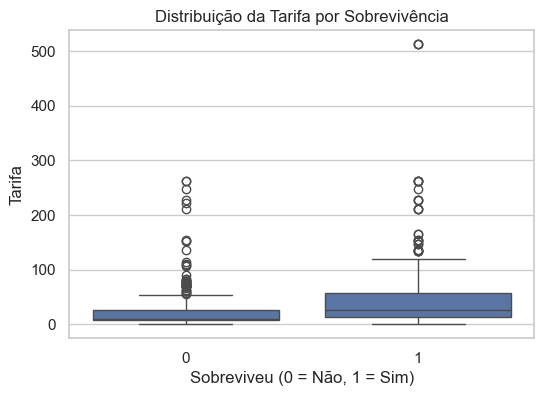

In [28]:
# Boxplot (comparação direta)
plt.figure(figsize=(6,4))

sns.boxplot(
    data=df,
    x="Survived",
    y="Fare"
)

plt.title("Distribuição da Tarifa por Sobrevivência")
plt.xlabel("Sobreviveu (0 = Não, 1 = Sim)")
plt.ylabel("Tarifa")

plt.show()

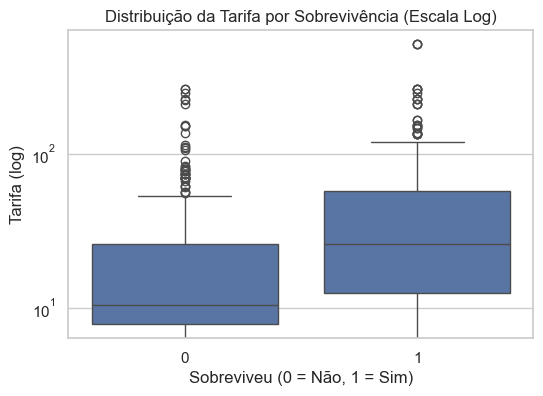

In [29]:
# Boxplot com escala logarítmica
plt.figure(figsize=(6,4))

sns.boxplot(
    data=df,
    x="Survived",
    y="Fare"
)

plt.yscale("log")
plt.title("Distribuição da Tarifa por Sobrevivência (Escala Log)")
plt.xlabel("Sobreviveu (0 = Não, 1 = Sim)")
plt.ylabel("Tarifa (log)")

plt.show()

## 🧠 Interpretação analítica
A análise da tarifa paga pelos passageiros revela uma associação clara com a sobrevivência. A mediana da tarifa entre os sobreviventes foi de aproximadamente 26, enquanto entre os não sobreviventes foi de cerca de 10,5, indicando que passageiros que pagaram tarifas mais altas tiveram maior probabilidade de sobreviver.

A comparação dos quartis reforça esse padrão, mostrando que toda a distribuição das tarifas dos sobreviventes está deslocada para valores mais elevados. Mesmo considerando a presença de outliers, a visualização em escala logarítmica confirma que a diferença não é explicada apenas por casos extremos.

Esses resultados sugerem que a tarifa — fortemente relacionada à classe do passageiro — foi um fator relevante na sobrevivência, refletindo desigualdades estruturais no processo de evacuação.

**Hipótese:**
```
Tarifas mais altas estão associadas a maior probabilidade de sobrevivência.
✅ Hipótese confirmada pelos dados.
```

---
## 🧪 Estudo 5 — Sobrevivência × Tamanho da Família (FamilySize)
### 📌 Pergunta analítica

O tamanho da família a bordo influenciou a probabilidade de sobrevivência?

Aqui buscamos identificar se:

* Viajar sozinho
* Viajar em famílias pequenas
* Viajar em famílias grandes

impactou as chances de sobrevivência.

In [30]:
# Taxa de sobrevivência por tamanho da família
survival_by_family = (
    df.groupby("FamilySize")["Survived"]
    .mean()
    .reset_index()
    .sort_values("FamilySize")
)

survival_by_family

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


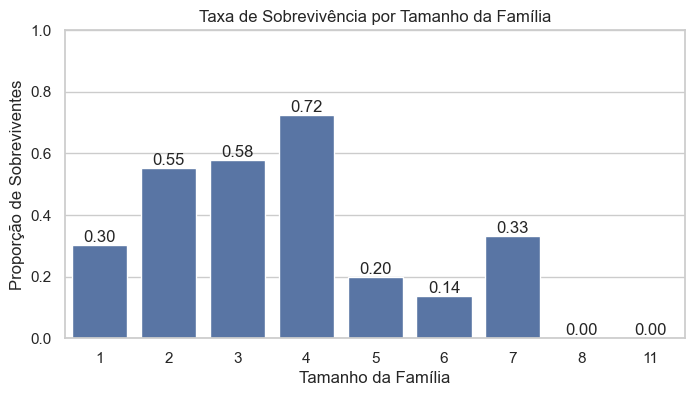

In [31]:
plt.figure(figsize=(8,4))

ax = sns.barplot(
    data=survival_by_family,
    x="FamilySize",
    y="Survived"
)

plt.title("Taxa de Sobrevivência por Tamanho da Família")
plt.xlabel("Tamanho da Família")
plt.ylabel("Proporção de Sobreviventes")
plt.ylim(0, 1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")

plt.show()

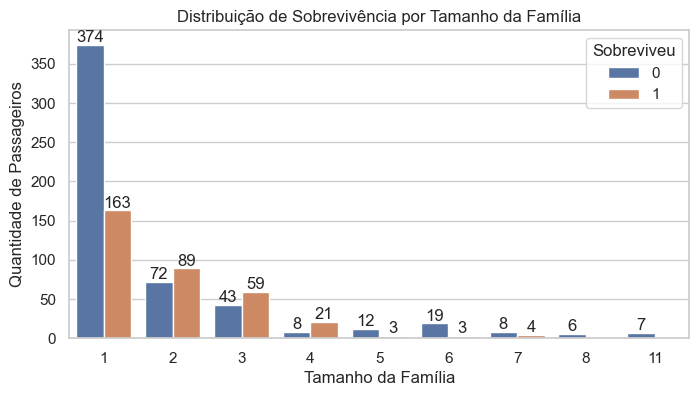

In [32]:
plt.figure(figsize=(8,4))

ax = sns.countplot(
    data=df,
    x="FamilySize",
    hue="Survived"
)

plt.title("Distribuição de Sobrevivência por Tamanho da Família")
plt.xlabel("Tamanho da Família")
plt.ylabel("Quantidade de Passageiros")
plt.legend(title="Sobreviveu")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

## 🧠 Interpretação analítica
A análise do tamanho da família em relação à sobrevivência revela um padrão não linear bastante evidente. Passageiros que viajavam sozinhos apresentaram uma taxa de sobrevivência relativamente baixa, de aproximadamente 30%.

O maior índice de sobrevivência foi observado entre famílias pequenas, especialmente aquelas compostas por 2 a 4 pessoas, com taxas variando entre 55% e 72%. Esse grupo apresentou as melhores chances de sobrevivência, possivelmente devido a uma combinação de cooperação familiar e menor complexidade durante o processo de evacuação.

Por outro lado, famílias grandes (com 5 ou mais membros) apresentaram uma queda acentuada na taxa de sobrevivência, chegando a valores próximos de zero em alguns casos. Isso sugere que o tamanho excessivo do grupo pode ter dificultado a evacuação, aumentando a exposição ao risco.

Esses resultados indicam que o tamanho da família foi um fator relevante na sobrevivência dos passageiros, com maior benefício associado a famílias pequenas.

**Hipótese:**
```
Passageiros com famílias muito grandes ou viajando sozinhos apresentam taxas de sobrevivência distintas.
✅ Hipótese confirmada pelos dados.
```

---
## 🔎 Análises Combinadas — Interação entre Variáveis

Após a análise individual das principais variáveis relacionadas à sobrevivência dos passageiros, esta etapa tem como objetivo investigar **a interação entre múltiplos fatores**.

Nesta fase, busca-se compreender como variáveis como **sexo, classe social e demais características** atuam em conjunto, permitindo uma análise mais profunda e próxima de cenários reais de tomada de decisão.

As análises a seguir avaliam se o impacto de uma variável se mantém consistente quando combinado com outras, aprofundando os insights obtidos na etapa anterior.


### 🧪 Estudo 6 — Sobrevivência × Classe × Sexo

In [33]:
# Taxa de sobrevivência por classe e sexo
survival_by_class_sex = (
    df.groupby(["Pclass", "Sex"])["Survived"]
    .mean()
    .reset_index()
)

survival_by_class_sex

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


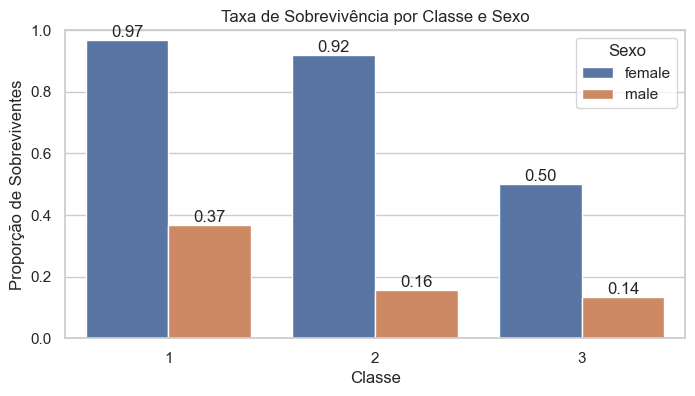

In [34]:
# Visualização combinada
plt.figure(figsize=(8,4))

ax = sns.barplot(
    data=survival_by_class_sex,
    x="Pclass",
    y="Survived",
    hue="Sex"
)

plt.title("Taxa de Sobrevivência por Classe e Sexo")
plt.xlabel("Classe")
plt.ylabel("Proporção de Sobreviventes")
plt.ylim(0, 1)
plt.legend(title="Sexo")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")

plt.show()

## 🧠 Interpretação analítica

A análise conjunta entre **classe social (Pclass)** e **sexo (Sex)** evidencia que o sexo foi o fator mais determinante na sobrevivência dos passageiros, seguido pela classe social.

As mulheres apresentaram taxas de sobrevivência significativamente superiores aos homens em todas as classes. Destaca-se que mulheres da 1ª e 2ª classe tiveram taxas extremamente elevadas, acima de 90%, indicando uma clara prioridade no resgate. Mesmo na 3ª classe, as mulheres apresentaram taxa de sobrevivência superior à dos homens da 1ª classe.

Entre os homens, observa-se que a classe social teve maior impacto. Passageiros da 1ª classe apresentaram taxa de sobrevivência mais que o dobro em comparação aos homens da 2ª e 3ª classes, que tiveram resultados bastante semelhantes entre si.

Esses resultados sugerem uma hierarquia implícita no processo de resgate, na qual o **sexo teve maior influência**, seguido pela **classe social**, reforçando a regra histórica de “mulheres primeiro”, especialmente entre os passageiros de classes mais altas.


---
## 🧪 Estudo 7 — Sobrevivência × Faixa Etária

In [35]:
# Criação das faixas etárias
bins = [0, 12, 18, 35, 60, 100]
labels = ['Criança', 'Adolescente', 'Jovem Adulto', 'Adulto', 'Idoso']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Verificando distribuição das faixas etárias
df['AgeGroup'].value_counts().sort_index()

AgeGroup
Criança          69
Adolescente      70
Jovem Adulto    535
Adulto          195
Idoso            22
Name: count, dtype: int64

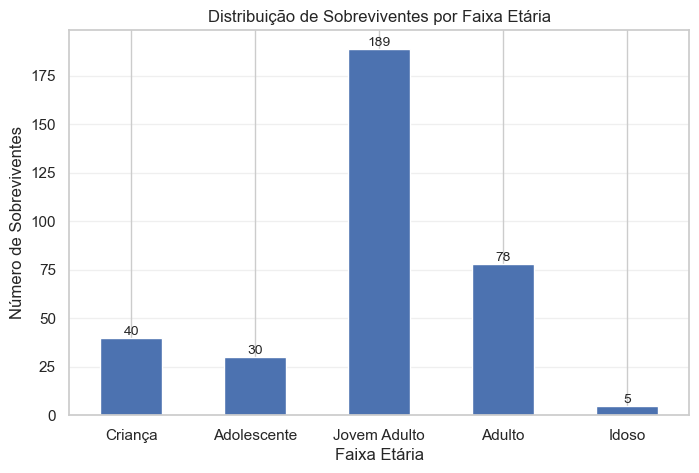

In [42]:
# Gráfico distribuição de sobreviventes por faixa etária
plt.figure(figsize=(8, 5))
ax = survivors_by_agegroup.plot(kind='bar')

plt.title('Distribuição de Sobreviventes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Sobreviventes')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Adicionando rótulos de dados
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()

In [38]:
# Taxa de sobrevivência por faixa etária
survival_by_agegroup = (
    df.groupby('AgeGroup', observed=True)['Survived']
      .mean()
      .sort_values(ascending=False)
)

survival_by_agegroup

AgeGroup
Criança         0.579710
Adolescente     0.428571
Adulto          0.400000
Jovem Adulto    0.353271
Idoso           0.227273
Name: Survived, dtype: float64

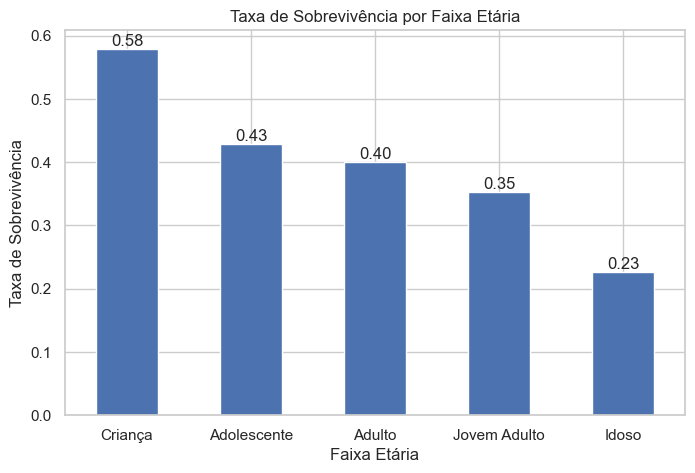

In [39]:
# Gráfico da taxa de sobrevivência por faixa etária
plt.figure(figsize=(8, 5))

ax = survival_by_agegroup.plot(kind='bar')

plt.title('Taxa de Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.show()

## 🧠 Interpretação Analítica — Sobrevivência × Faixa Etária

A análise da sobrevivência por faixa etária evidencia que a idade exerceu influência relevante na probabilidade de sobrevivência dos passageiros do Titanic, porém essa influência deve ser interpretada com cautela ao diferenciar taxas relativas de volumes absolutos.

Em termos de taxa de sobrevivência, observa-se um comportamento decrescente conforme o avanço da faixa etária:
* Crianças apresentaram a maior taxa de sobrevivência, indicando forte priorização durante o resgate.
* Adolescentes e adultos mantiveram taxas intermediárias.
* Jovens adultos, apesar de representarem o maior grupo populacional, apresentaram taxa inferior à dos adultos.
* Idosos tiveram a menor taxa de sobrevivência.

Entretanto, ao analisar a distribuição absoluta de sobreviventes, o cenário se altera. Os jovens adultos representam aproximadamente 60% dos passageiros, e mesmo com uma taxa de sobrevivência menor (~35%), correspondem ao maior número absoluto de sobreviventes, com cerca de 187 pessoas salvas.

Por outro lado, os adultos, embora apresentem uma taxa de sobrevivência maior (~40%), representam apenas cerca de 21% da população, resultando em aproximadamente 78 sobreviventes.

Esse contraste demonstra que altas taxas percentuais não necessariamente implicam maior impacto absoluto, reforçando a importância de analisar conjuntamente:
* Proporção (taxa de sobrevivência)
* Volume populacional (distribuição dos passageiros)

A análise confirma que a idade foi um fator relevante, mas seu efeito deve ser interpretado em conjunto com a representatividade de cada grupo etário, evitando conclusões simplistas baseadas apenas em percentuais.

---
## 🧪 Estudo 8 — Sobrevivência × Tarifa (Fare em faixas)

In [52]:
# Distribuição das faixas de tarifa
fare_distribution = df['FareGroup'].value_counts().sort_index()
fare_distribution

FareGroup
Baixa          223
Média Baixa    224
Média Alta     222
Alta           222
Name: count, dtype: int64

In [54]:
# Contagem de sobreviventes por faixa de tarifa
fare_survivors = (
    df[df['Survived'] == 1]
    .groupby('FareGroup', observed=True)['Survived']
    .count()
)

fare_survivors

FareGroup
Baixa           44
Média Baixa     68
Média Alta     101
Alta           129
Name: Survived, dtype: int64

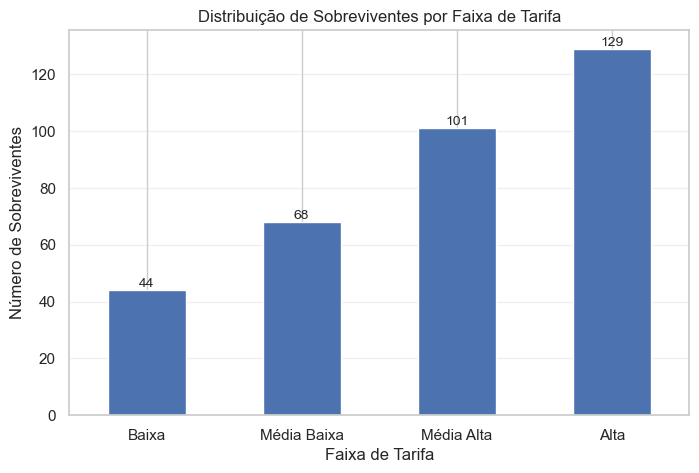

In [55]:
plt.figure(figsize=(8, 5))
ax = fare_survivors.plot(kind='bar')

plt.title('Distribuição de Sobreviventes por Faixa de Tarifa')
plt.xlabel('Faixa de Tarifa')
plt.ylabel('Número de Sobreviventes')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()

In [51]:
# Taxa de sobrevivência por faixa de tarifa
fare_survival_rate = (
    df
    .groupby('FareGroup', observed=True)['Survived']
    .mean()
)

fare_survival_rate

FareGroup
Baixa          0.197309
Média Baixa    0.303571
Média Alta     0.454955
Alta           0.581081
Name: Survived, dtype: float64

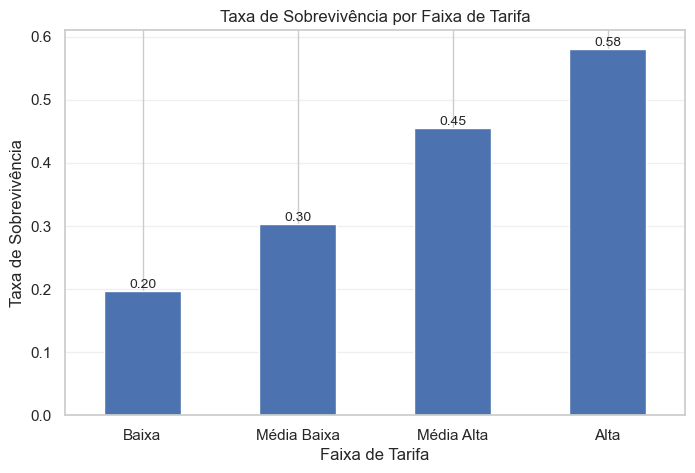

In [53]:
plt.figure(figsize=(8, 5))
ax = fare_survival_rate.plot(kind='bar')

plt.title('Taxa de Sobrevivência por Faixa de Tarifa')
plt.xlabel('Faixa de Tarifa')
plt.ylabel('Taxa de Sobrevivência')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()

## 🧠 Interpretação Analítica — Sobrevivência × Tarifa (Fare em faixas)

A análise da sobrevivência por faixas de tarifa evidencia uma relação positiva e monotônica entre o valor pago pela passagem e a probabilidade de sobrevivência dos passageiros.

Observa-se que:
* Passageiros na faixa de tarifa baixa apresentaram a menor taxa de sobrevivência (~19,7%), além do menor número absoluto de sobreviventes (44 pessoas).
* À medida que a tarifa aumenta, há um crescimento progressivo tanto na taxa de sobrevivência quanto no número absoluto de sobreviventes.
* Passageiros na faixa de tarifa alta alcançaram a maior taxa de sobrevivência (~58,1%) e o maior número absoluto de sobreviventes (129 pessoas).

Esse padrão sugere que o valor da tarifa funcionou como um proxy de condição socioeconômica, refletindo maior acesso a cabines melhor localizadas, proximidade de botes salva-vidas e possivelmente maior prioridade durante o processo de evacuação.

A consistência entre:
* crescimento das taxas percentuais
* aumento do volume absoluto de sobreviventes

reforça a robustez da relação observada, reduzindo a possibilidade de um efeito meramente populacional.

Portanto, os resultados confirmam a hipótese inicial de que passageiros com maior poder aquisitivo apresentaram maiores chances de sobrevivência, consolidando a variável Fare como um dos fatores mais relevantes para explicar o desfecho de sobrevivência no Titanic.

---
## 🧪 Estudo 9 — Sobrevivência × Tamanho da Família × Classe

In [57]:
# Taxa de sobrevivência por tamanho da família e classe
family_class_survival = (
    df
    .groupby(['Pclass', 'FamilySize'], observed=True)['Survived']
    .mean()
    .reset_index()
)

family_class_survival.head(10)

,Pclass,FamilySize,Survived
0,1,1,0.532110
1,1,2,0.728571
2,1,3,0.750000
3,1,4,0.714286
4,1,5,1.000000
5,1,6,0.500000
6,2,1,0.346154
7,2,2,0.529412
8,2,3,0.677419
9,2,4,0.769231


In [58]:
# Mantendo apenas FamilySize até 6 (mais representativos)
family_class_filtered = family_class_survival[
    family_class_survival['FamilySize'] <= 6
]

family_class_filtered

,Pclass,FamilySize,Survived
0,1,1,0.532110
1,1,2,0.728571
2,1,3,0.750000
3,1,4,0.714286
4,1,5,1.000000
5,1,6,0.500000
6,2,1,0.346154
7,2,2,0.529412
8,2,3,0.677419
9,2,4,0.769231


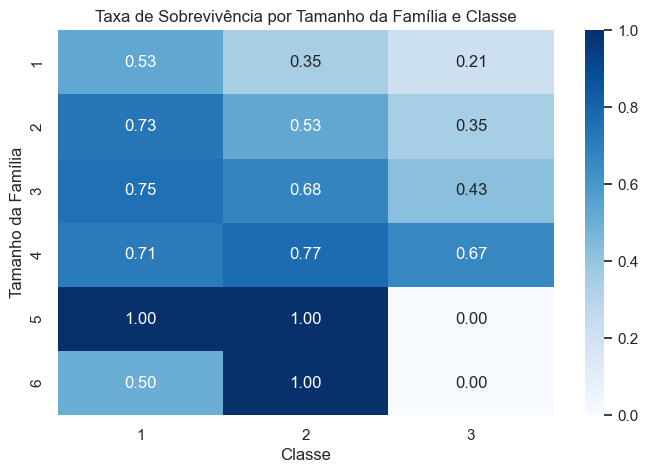

In [59]:
# Pivot para o heatmap
pivot_family_class = family_class_filtered.pivot(
    index='FamilySize',
    columns='Pclass',
    values='Survived'
)

plt.figure(figsize=(8, 5))
sns.heatmap(
    pivot_family_class,
    annot=True,
    fmt=".2f",
    cmap='Blues'
)

plt.title('Taxa de Sobrevivência por Tamanho da Família e Classe')
plt.xlabel('Classe')
plt.ylabel('Tamanho da Família')
plt.show()

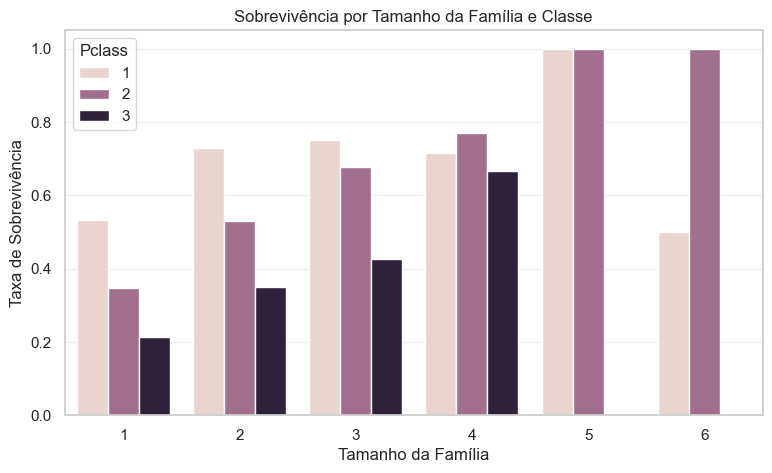

In [60]:
plt.figure(figsize=(9, 5))
sns.barplot(
    data=family_class_filtered,
    x='FamilySize',
    y='Survived',
    hue='Pclass'
)

plt.title('Sobrevivência por Tamanho da Família e Classe')
plt.xlabel('Tamanho da Família')
plt.ylabel('Taxa de Sobrevivência')
plt.grid(axis='y', alpha=0.3)
plt.show()

## 🧠 Interpretação Analítica
A análise combinada entre tamanho da família e classe social evidencia que o impacto do `FamilySize`
na sobrevivência não ocorre de forma isolada, sendo fortemente influenciado pela classe do passageiro.

Observa-se que, para um mesmo tamanho de família, passageiros das classes mais altas apresentam
consistentemente maiores taxas de sobrevivência, enquanto a 3ª classe concentra os piores resultados.
Isso indica que a classe social atua como um fator amplificador das chances de sobrevivência.

Famílias pequenas (2 a 4 pessoas) apresentam as maiores taxas de sobrevivência em todas as classes,
sugerindo que viajar em pequenos grupos ofereceu vantagens práticas durante o resgate.
Esse efeito é mais pronunciado nas classes 1ª e 2ª, enquanto na 3ª classe, mesmo famílias pequenas
mantêm taxas inferiores.

Por outro lado, famílias grandes (5 ou mais pessoas) mostram um comportamento crítico na 3ª classe,
com taxas de sobrevivência extremamente baixas ou nulas, indicando dificuldades adicionais para esse
grupo durante a evacuação.

De forma geral, os resultados indicam que:
- O tamanho da família influencia a sobrevivência,
- Porém a classe social é o fator dominante,
- E a combinação mais favorável observada foi: famílias pequenas em classes mais altas.

Este estudo reforça que a sobrevivência no Titanic foi resultado da interação entre fatores sociais
e estruturais, e não da atuação isolada de uma única variável.

---
## 🧪 Estudo 10 — Síntese das Hipóteses

Após a realização das análises exploratórias individuais e combinadas, este estudo consolida
as hipóteses levantadas no início do projeto, classificando-as com base nas evidências observadas
ao longo da EDA.

**Hipótese 1 — Passageiros do sexo feminino tiveram maior probabilidade de sobrevivência.**  
✅ **Confirmada**  
A análise evidenciou diferenças expressivas nas taxas de sobrevivência entre homens e mulheres,
com vantagem consistente para o sexo feminino em todas as classes sociais analisadas.

---

**Hipótese 2 — Passageiros da 1ª classe apresentaram maior probabilidade de sobrevivência.**  
✅ **Confirmada**  
Observou-se um gradiente claro de sobrevivência decrescente da 1ª para a 3ª classe, indicando
forte influência da posição socioeconômica no desfecho.

---

**Hipótese 3 — Passageiros mais jovens tiveram maior probabilidade de sobrevivência.**  
⚠️ **Parcialmente confirmada**  
Embora crianças tenham apresentado as maiores taxas de sobrevivência, adultos jovens,
apesar de representarem o maior volume populacional, tiveram taxas inferiores às de adultos.
Isso indica que a idade influenciou a sobrevivência, mas não de forma linear ou isolada.

---

**Hipótese 4 — Tarifas mais altas estão associadas a maior probabilidade de sobrevivência.**  
✅ **Confirmada**  
A segmentação da tarifa em faixas evidenciou aumento progressivo da taxa e do volume absoluto
de sobreviventes conforme o valor pago pela passagem, reforçando o papel da condição socioeconômica.

---

**Hipótese 5 — O tamanho da família influencia a sobrevivência dos passageiros.**  
⚠️ **Parcialmente confirmada**  
Famílias pequenas (2 a 4 pessoas) apresentaram melhores taxas de sobrevivência, enquanto passageiros
sozinhos ou em famílias grandes tiveram desempenho inferior. No entanto, esse efeito mostrou-se
fortemente dependente da classe social.

---

**Hipótese 6 — A combinação entre fatores sociais amplifica a sobrevivência.**  
✅ **Confirmada**  
As análises combinadas demonstraram que variáveis como sexo, classe e tamanho da família
interagem entre si, potencializando ou limitando as chances de sobrevivência, sendo a classe
social o fator dominante.

---
## 📊 Síntese dos Principais Insights
Com base nas análises exploratórias realizadas ao longo do projeto, foi possível identificar padrões consistentes relacionados à sobrevivência dos passageiros do Titanic.

Os principais insights obtidos foram:

- **Sexo foi o fator isolado mais determinante para a sobrevivência**: mulheres apresentaram taxas significativamente superiores às dos homens, indicando priorização clara durante o processo de evacuação.

- **Classe social exerceu forte influência na sobrevivência**: passageiros da 1ª classe tiveram maiores taxas de sobrevivência, enquanto a 3ª classe concentrou a maioria das vítimas, evidenciando um viés socioeconômico.

- **Idade, de forma isolada, não foi um fator determinante**, porém passageiros mais jovens, especialmente crianças, apresentaram leve vantagem em termos de sobrevivência.

- **Tarifa paga (Fare) apresentou correlação positiva com sobrevivência**: passageiros que pagaram tarifas mais altas tiveram maior probabilidade de sobreviver, reforçando a relação entre status socioeconômico e acesso aos meios de salvamento.

- **Tamanho da família teve efeito não linear**: passageiros viajando sozinhos ou em famílias grandes apresentaram menores taxas de sobrevivência, enquanto famílias pequenas (2 a 4 pessoas) tiveram os melhores resultados.

- **A combinação entre classe social e tamanho da família potencializou os efeitos observados**: famílias pequenas na 1ª e 2ª classes apresentaram as maiores taxas de sobrevivência, sugerindo vantagens cumulativas.

Esses resultados indicam que a sobrevivência no desastre do Titanic não foi aleatória, mas fortemente influenciada por fatores sociais, econômicos e demográficos.


---
## ⚠️ Limitações do Estudo e Próximos Passos
### Limitações do Estudo

- O conjunto de dados possui valores ausentes, especialmente na variável `Age`, o que pode introduzir viés mesmo após tratamentos.
- As análises realizadas são majoritariamente correlacionais, não permitindo inferência causal.
- Variáveis relevantes para a sobrevivência não estão disponíveis, como localização da cabine, tempo de reação ou proximidade dos botes salva-vidas.

### Próximos Passos

- Realizar engenharia de atributos adicional (ex: categorias combinadas de classe + gênero).
- Construir modelos preditivos de classificação para estimar a probabilidade de sobrevivência.
- Avaliar o desempenho dos modelos com métricas apropriadas (Accuracy, Precision, Recall, ROC-AUC).